# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [50]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [51]:
df = pd.read_csv('SC_Temp_and_Heat_Index_Data.csv',delimiter=',',skipfooter=14,engine='python')

In [52]:
df

,Notes,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,South Carolina,45,69.12
1,NaN,"Jan 02, 1979",1979/01/02,South Carolina,45,63.22
2,NaN,"Jan 03, 1979",1979/01/03,South Carolina,45,31.42
3,NaN,"Jan 04, 1979",1979/01/04,South Carolina,45,39.25
4,NaN,"Jan 05, 1979",1979/01/05,South Carolina,45,44.90
...,...,...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,South Carolina,45,60.14
12049,NaN,"Dec 28, 2011",2011/12/28,South Carolina,45,53.17
12050,NaN,"Dec 29, 2011",2011/12/29,South Carolina,45,54.87
12051,NaN,"Dec 30, 2011",2011/12/30,South Carolina,45,60.45


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [53]:
# Already dropped total row from download

df = df.drop(columns=['Notes', 'Month Day, Year Code'])
df

,"Month Day, Year",State,State Code,Avg Daily Max Air Temperature (F)
0,"Jan 01, 1979",South Carolina,45,69.12
1,"Jan 02, 1979",South Carolina,45,63.22
2,"Jan 03, 1979",South Carolina,45,31.42
3,"Jan 04, 1979",South Carolina,45,39.25
4,"Jan 05, 1979",South Carolina,45,44.90
...,...,...,...,...
12048,"Dec 27, 2011",South Carolina,45,60.14
12049,"Dec 28, 2011",South Carolina,45,53.17
12050,"Dec 29, 2011",South Carolina,45,54.87
12051,"Dec 30, 2011",South Carolina,45,60.45


>3) Make a column called Date that is in the pandas datetime format

In [54]:
df['Date'] = pd.to_datetime(df['Month Day, Year'],errors='raise')
df


,"Month Day, Year",State,State Code,Avg Daily Max Air Temperature (F),Date
0,"Jan 01, 1979",South Carolina,45,69.12,1979-01-01
1,"Jan 02, 1979",South Carolina,45,63.22,1979-01-02
2,"Jan 03, 1979",South Carolina,45,31.42,1979-01-03
3,"Jan 04, 1979",South Carolina,45,39.25,1979-01-04
4,"Jan 05, 1979",South Carolina,45,44.90,1979-01-05
...,...,...,...,...,...
12048,"Dec 27, 2011",South Carolina,45,60.14,2011-12-27
12049,"Dec 28, 2011",South Carolina,45,53.17,2011-12-28
12050,"Dec 29, 2011",South Carolina,45,54.87,2011-12-29
12051,"Dec 30, 2011",South Carolina,45,60.45,2011-12-30


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [55]:
year = []
month = []
day = []
for i in df['Month Day, Year']:
    dstring = str(pd.to_datetime(i))
    year.append(int(dstring[0:4]))
    month.append(int(dstring[5:7]))
    day.append(int(dstring[8:10]))

df = df.assign(Year = year, Month = month, Day = day)
df

,"Month Day, Year",State,State Code,Avg Daily Max Air Temperature (F),Date,Year,Month,Day
0,"Jan 01, 1979",South Carolina,45,69.12,1979-01-01,1979,1,1
1,"Jan 02, 1979",South Carolina,45,63.22,1979-01-02,1979,1,2
2,"Jan 03, 1979",South Carolina,45,31.42,1979-01-03,1979,1,3
3,"Jan 04, 1979",South Carolina,45,39.25,1979-01-04,1979,1,4
4,"Jan 05, 1979",South Carolina,45,44.90,1979-01-05,1979,1,5
...,...,...,...,...,...,...,...,...
12048,"Dec 27, 2011",South Carolina,45,60.14,2011-12-27,2011,12,27
12049,"Dec 28, 2011",South Carolina,45,53.17,2011-12-28,2011,12,28
12050,"Dec 29, 2011",South Carolina,45,54.87,2011-12-29,2011,12,29
12051,"Dec 30, 2011",South Carolina,45,60.45,2011-12-30,2011,12,30


In [56]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

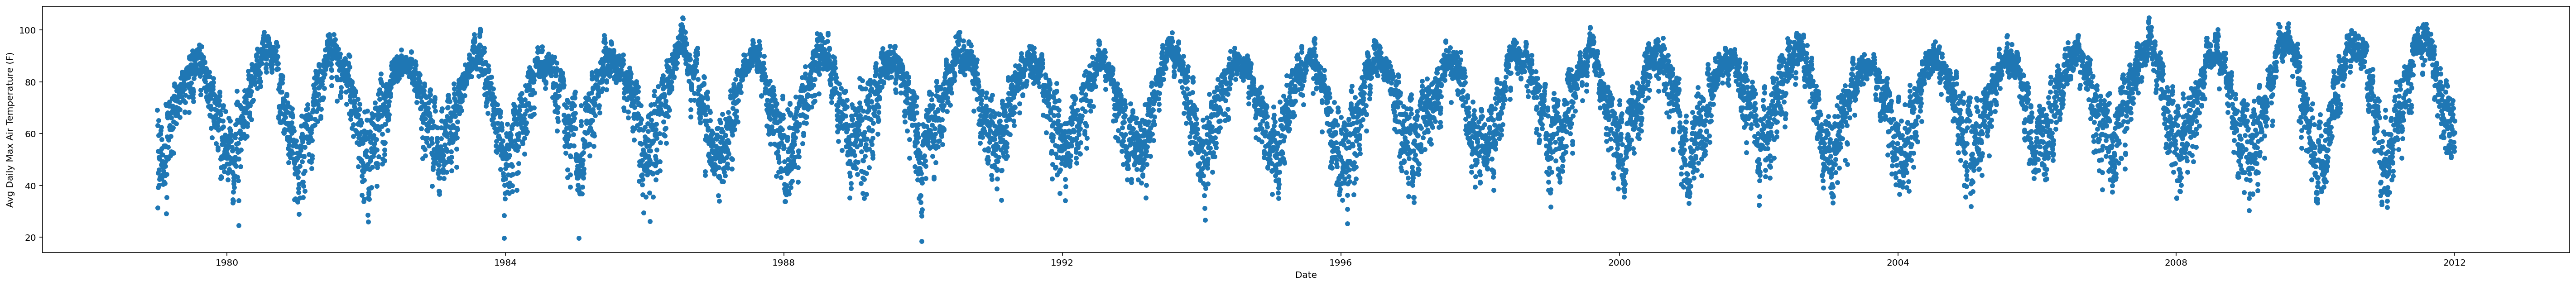

In [57]:
df.plot.scatter(x = 'Date', y = 'Avg Daily Max Air Temperature (F)', figsize=(50,5))

>5) Describe your plot.

In [58]:
# The plot consistently goes up from about 25 to 100 and back down to 25 in a curve every year

### Adding colors for our graph

In [59]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

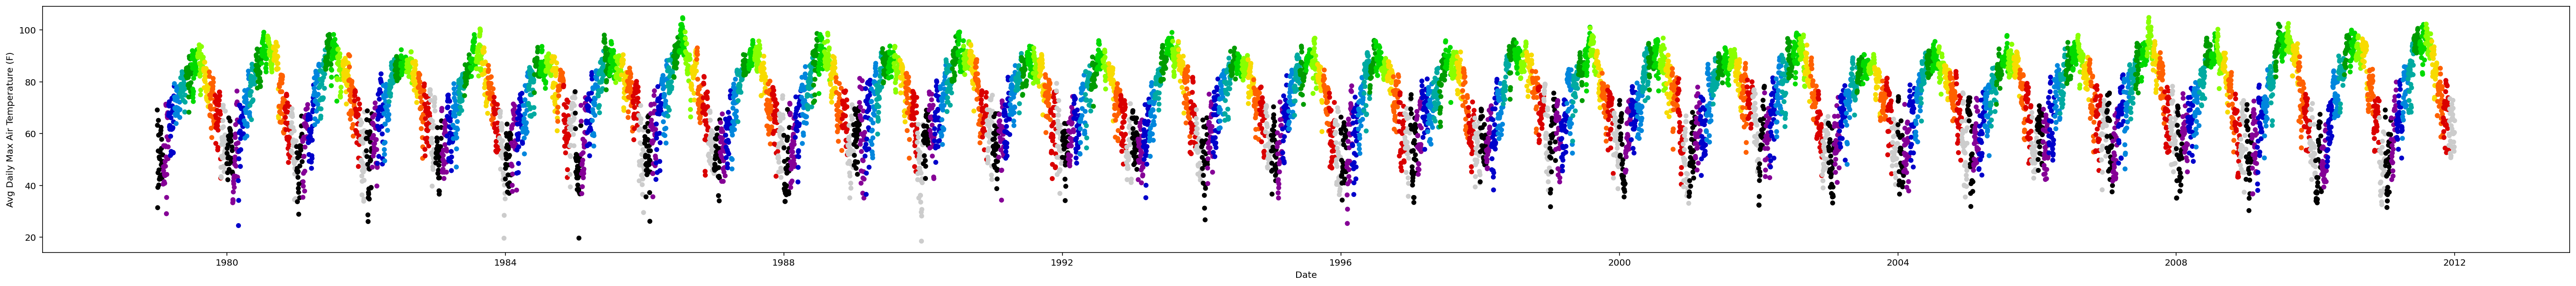

In [60]:
df.plot.scatter(x = 'Date', y = 'Avg Daily Max Air Temperature (F)', figsize=(50,5), c=df['color'])

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [61]:
index = 0
start = []
for i in df['Date']:
    index+=1
    if (i > pd.datetime(2011,6,29)) & (i <= pd.datetime(2011,12,31)):
        start.append(index)

subset = df[['Month Day, Year', 'State', 'State Code', 'Avg Daily Max Air Temperature (F)', 'Date', 'Year', 'Month', 'Day', 'color', 'DateInt']][start[0]:start[-1]]
subset

,"Month Day, Year",State,State Code,Avg Daily Max Air Temperature (F),Date,Year,Month,Day,color,DateInt
11869,"Jul 01, 2011",South Carolina,45,94.33,2011-07-01,2011,7,1,#00da00,13094784.0
11870,"Jul 02, 2011",South Carolina,45,94.95,2011-07-02,2011,7,2,#00da00,13095648.0
11871,"Jul 03, 2011",South Carolina,45,95.40,2011-07-03,2011,7,3,#00da00,13096512.0
11872,"Jul 04, 2011",South Carolina,45,95.55,2011-07-04,2011,7,4,#00da00,13097376.0
11873,"Jul 05, 2011",South Carolina,45,92.72,2011-07-05,2011,7,5,#00da00,13098240.0
...,...,...,...,...,...,...,...,...,...,...
12048,"Dec 27, 2011",South Carolina,45,60.14,2011-12-27,2011,12,27,#cccccc,13249440.0
12049,"Dec 28, 2011",South Carolina,45,53.17,2011-12-28,2011,12,28,#cccccc,13250304.0
12050,"Dec 29, 2011",South Carolina,45,54.87,2011-12-29,2011,12,29,#cccccc,13251168.0
12051,"Dec 30, 2011",South Carolina,45,60.45,2011-12-30,2011,12,30,#cccccc,13252032.0


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

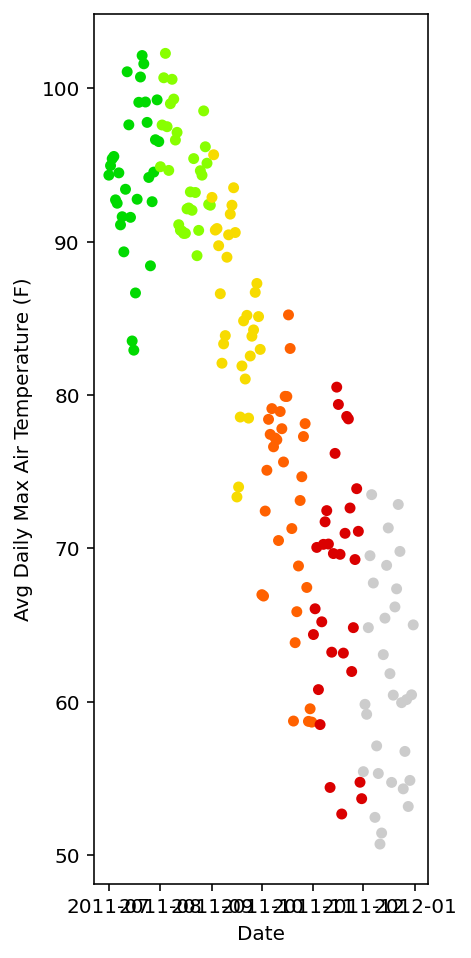

In [62]:
subset.plot.scatter(x = 'Date', y = 'Avg Daily Max Air Temperature (F)', figsize=(3,8), c=subset['color'])

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [63]:
X=subset['DateInt'].values
Y=subset['Avg Daily Max Air Temperature (F)'].values

In [64]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [81]:
Y_pred = lin_reg(X,Y)

-0.0002756987654083164 3711.4654454258252


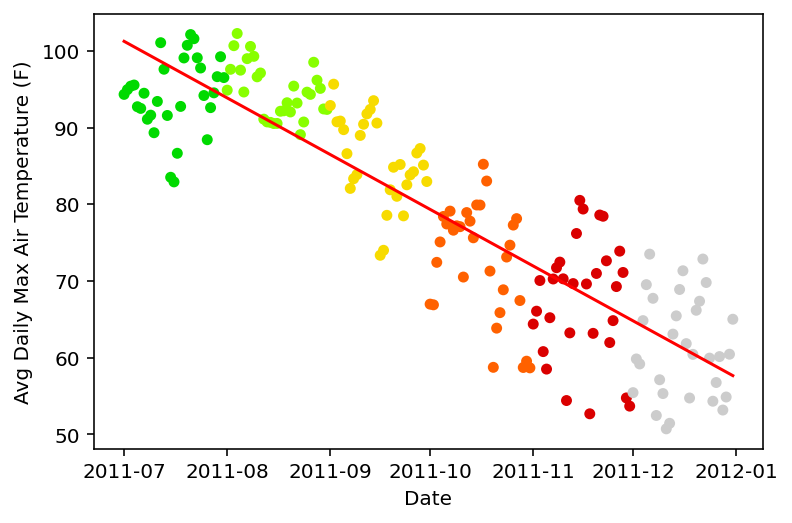

In [82]:
subset.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=subset['color'])
y_vals = Y_pred
plt.plot(subset['Date'].values, y_vals, color = 'red')

>9) What are the slope and intercept of your best fit line?

In [90]:
def slope(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m)
    
    # Calculate our predicted y values
#    y_pred = m*x + b
    
#    return y_pred

def intercept(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (b)
    
    # Calculate our predicted y values
#    y_pred = m*x + b
    
#    return y_pred

In [91]:
# The slope is...
slope(X,Y)

-0.0002756987654083164


In [92]:
# The intercept is...
intercept(X,Y)

3711.4654454258252


>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [97]:
[min(Y_pred), max(Y_pred)]
# The slope is negative

[57.65838014101064, 101.2496633372507]

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [98]:
X=df['DateInt'].values
Y=df['Avg Daily Max Air Temperature (F)'].values

In [99]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [100]:
Y_pred = lin_reg(X,Y)

2.601806952615305e-07 70.44393079249659


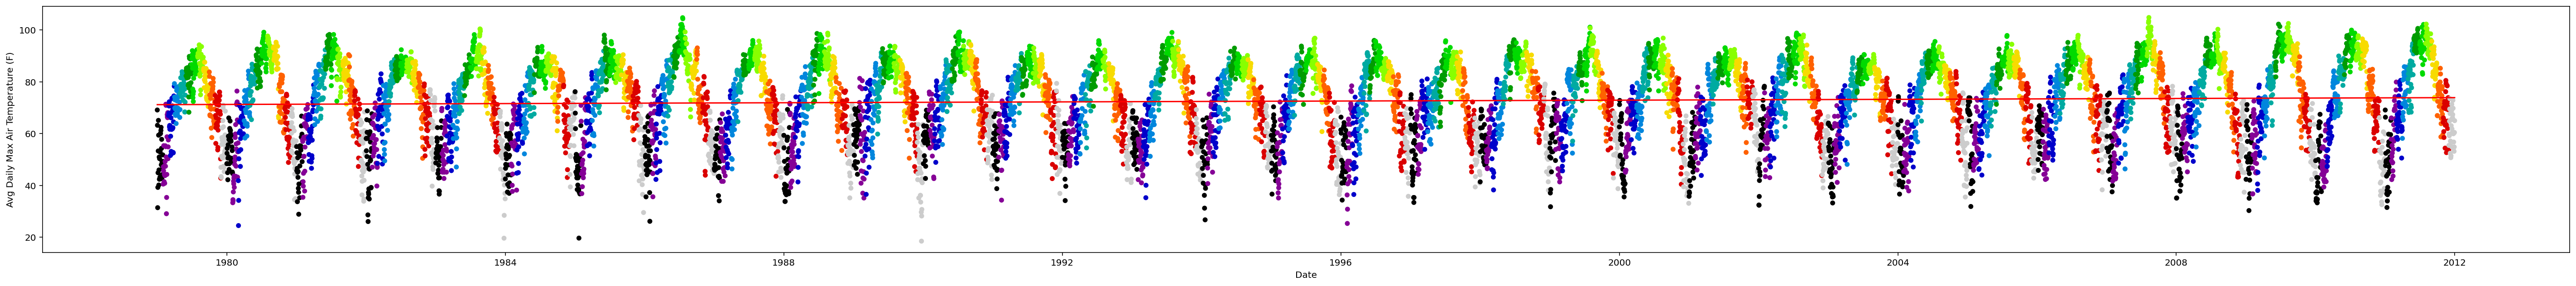

In [103]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=df['color'], figsize=(50,5))
y_vals = Y_pred
plt.plot(df['Date'].values, y_vals, color = 'red')

>12) Is the slope positive or negative? What do you think that means?

In [104]:
# The slope is positive which means that the overall temperatures have been rising over time